In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/NetworkSecurityProject/Network_Data/phisingData.csv")

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [6]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [7]:
df.shape

(11055, 31)

In [8]:
df['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

In [9]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

C:\Users\jashk\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 640x480 with 0 Axes>

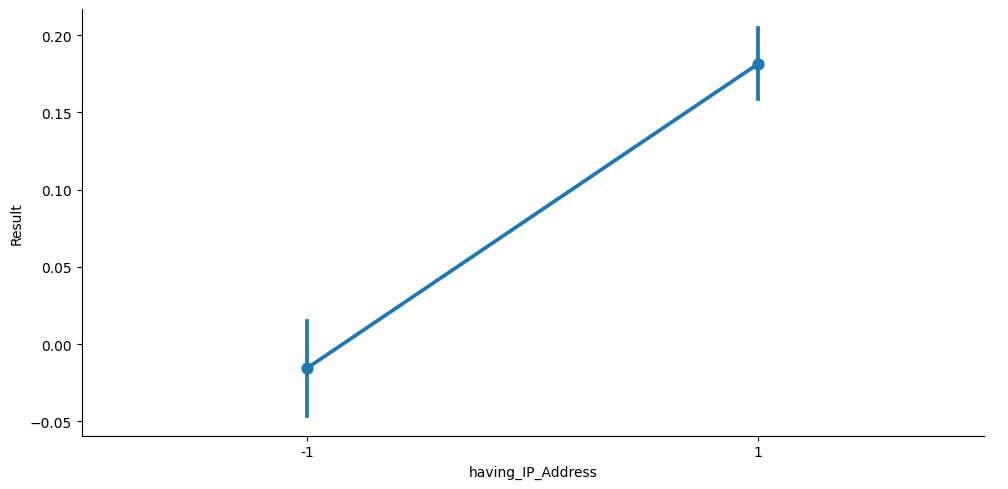

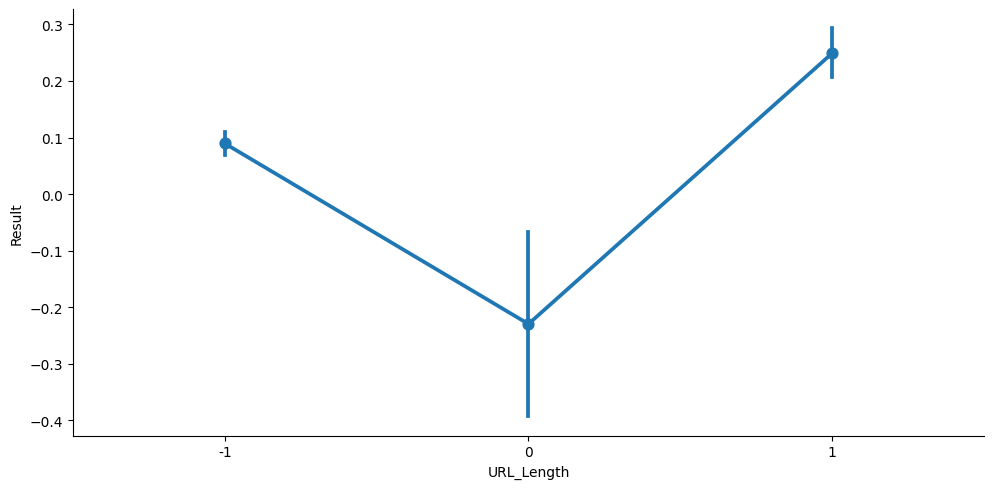

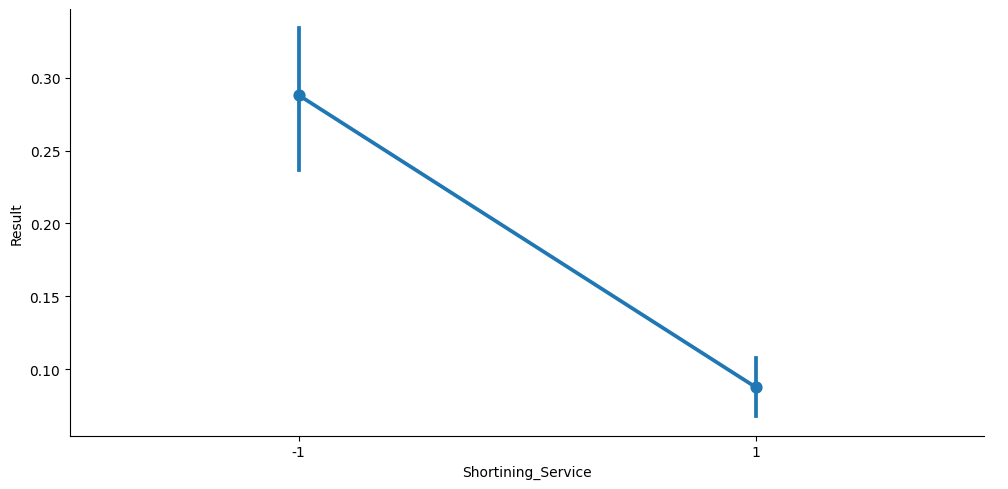

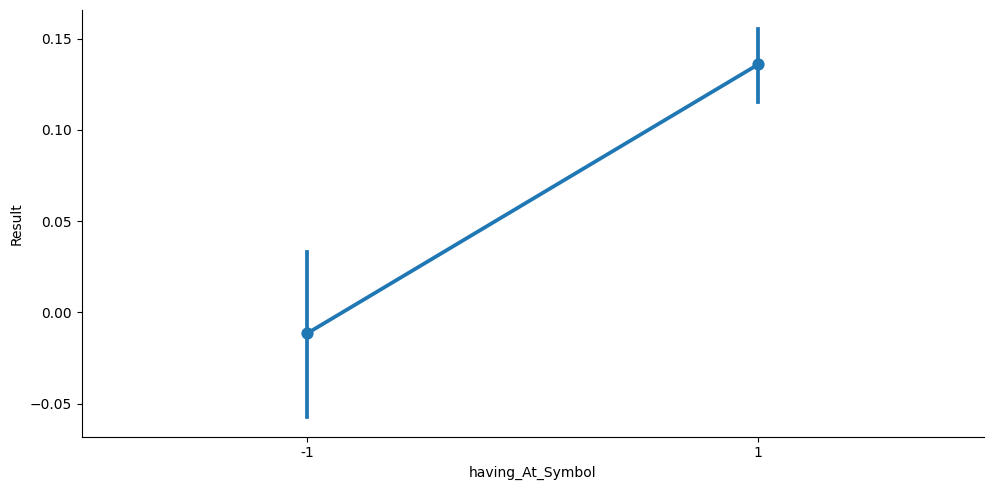

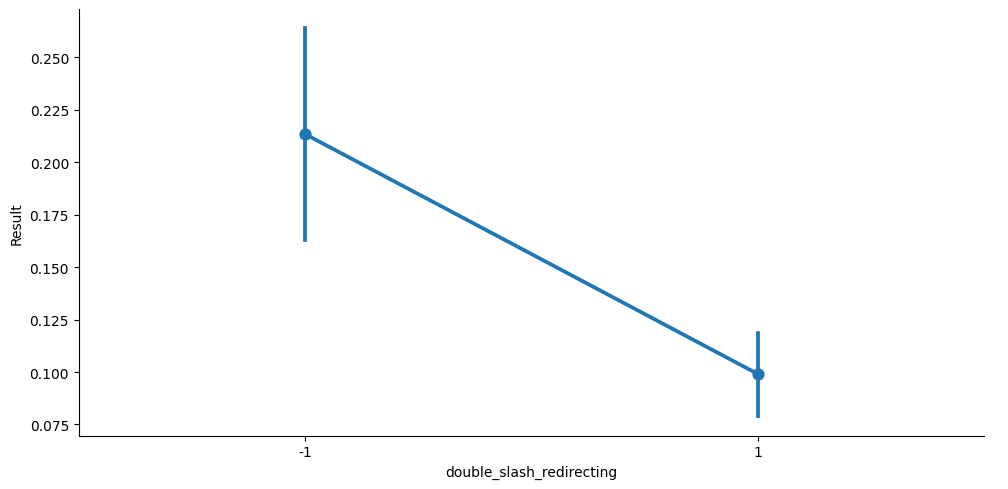

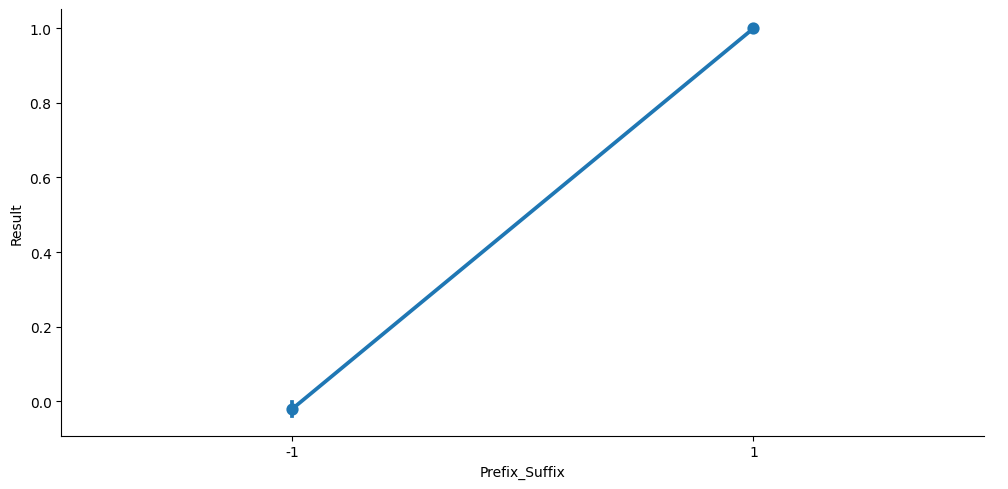

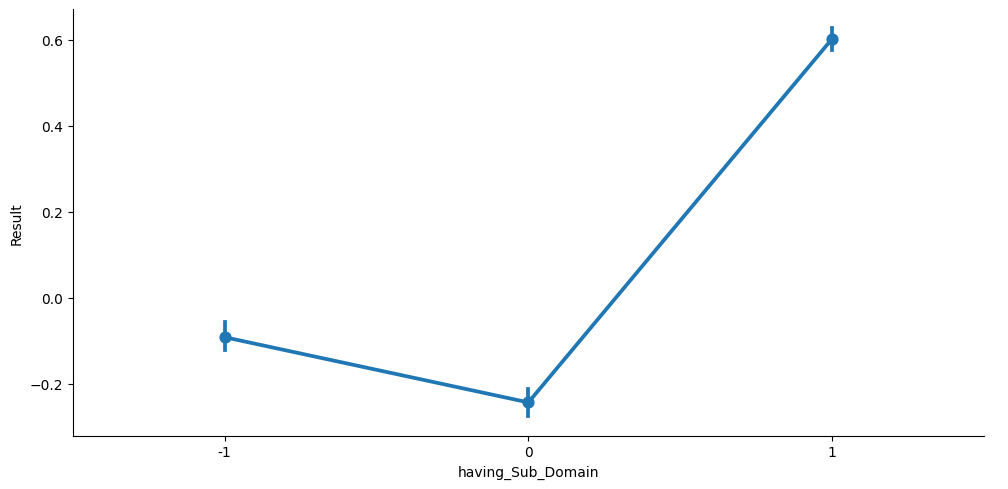

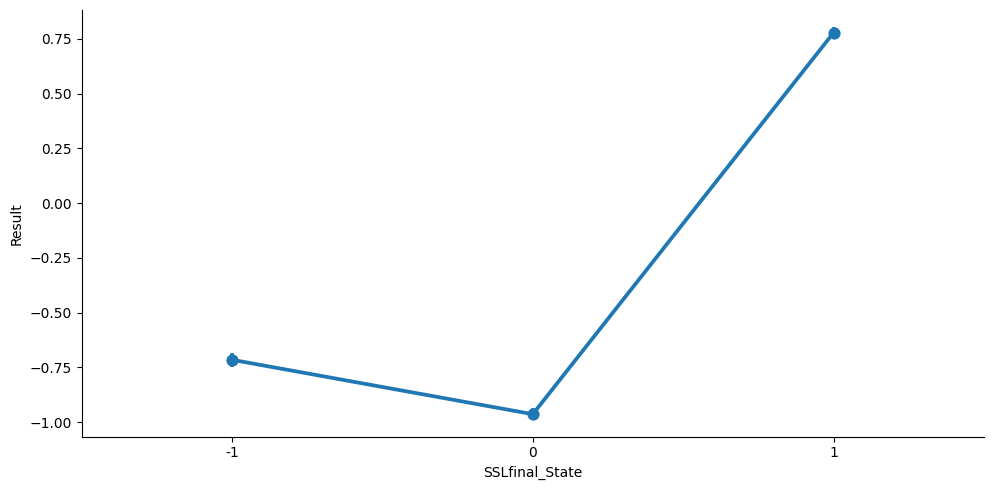

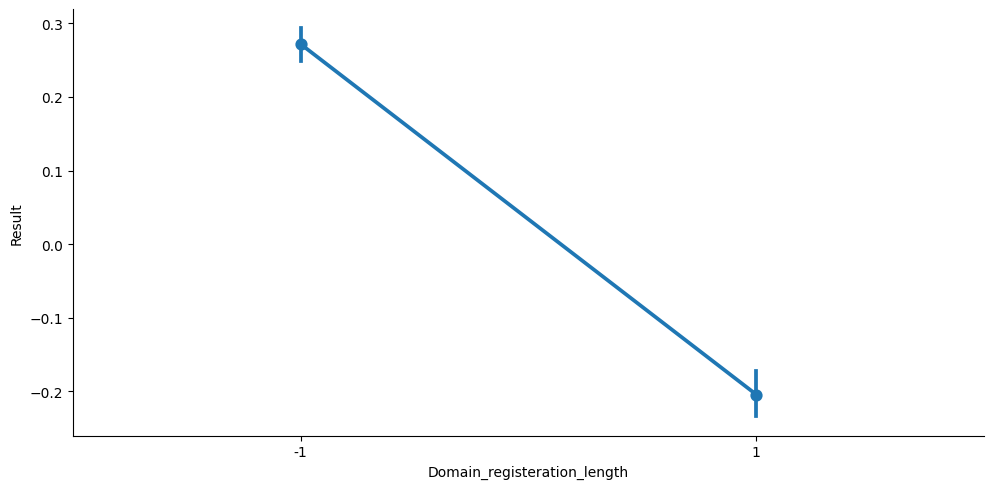

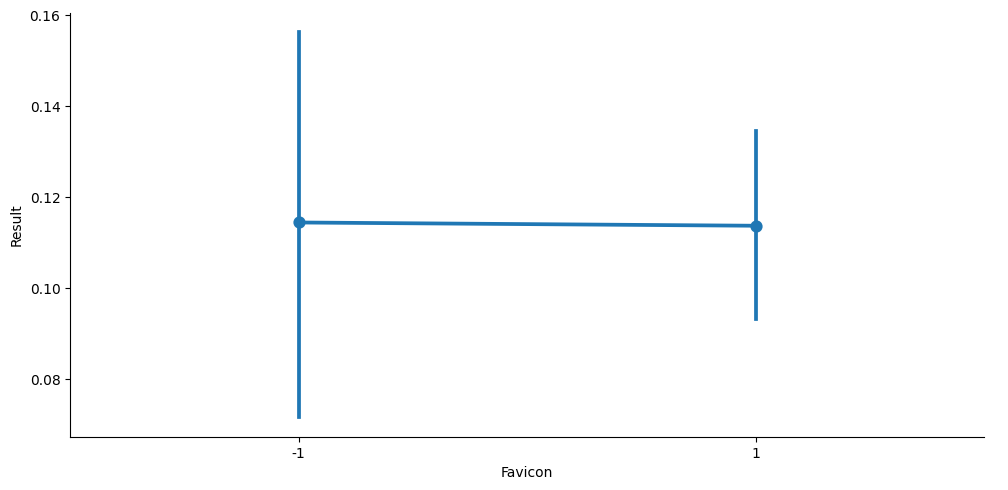

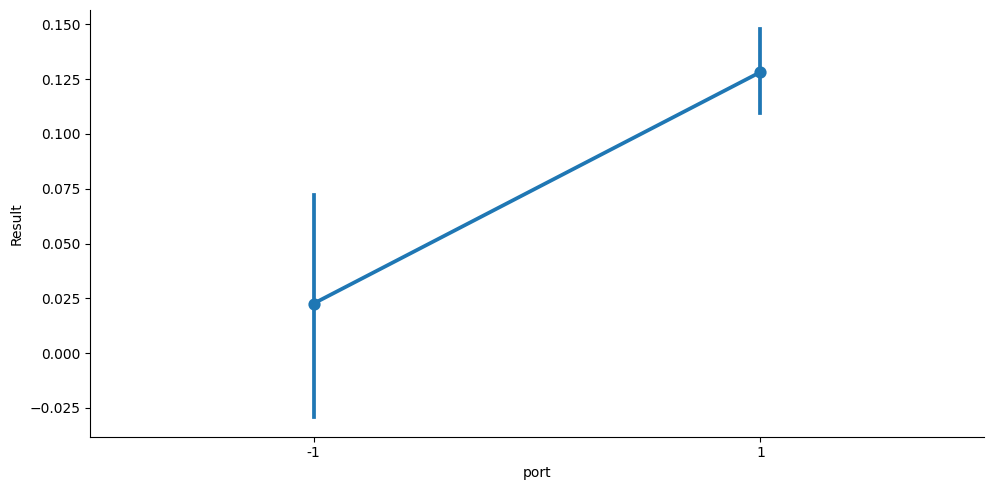

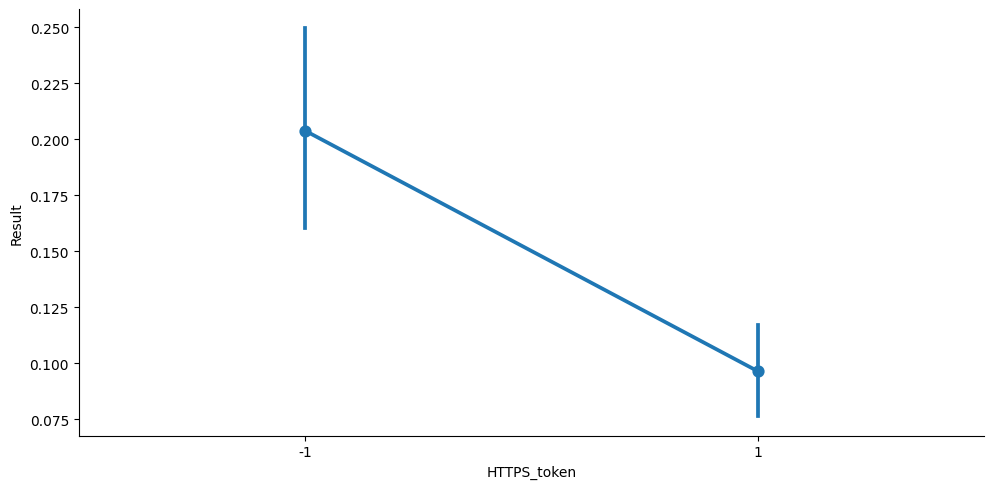

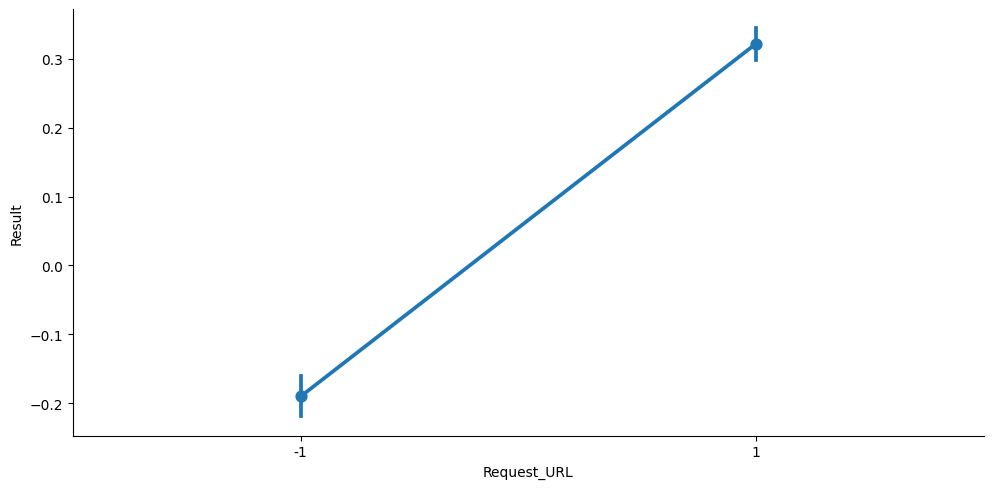

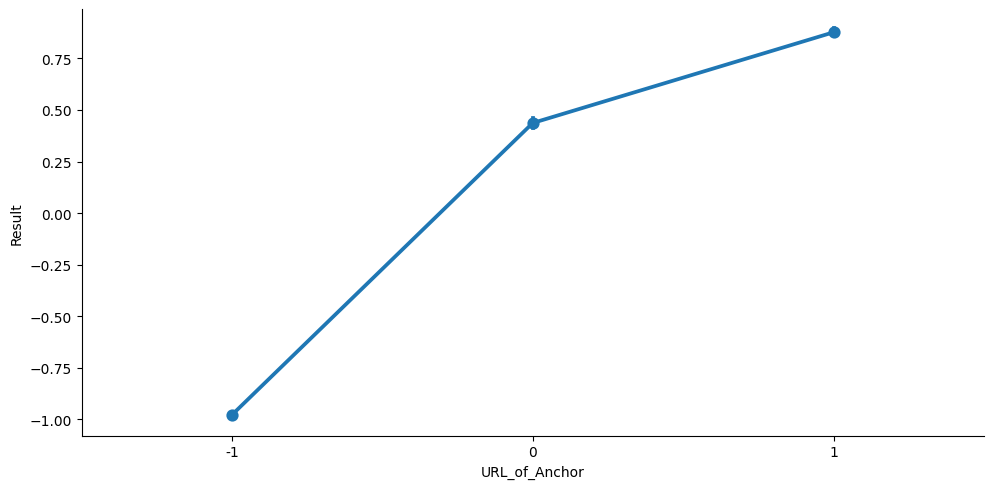

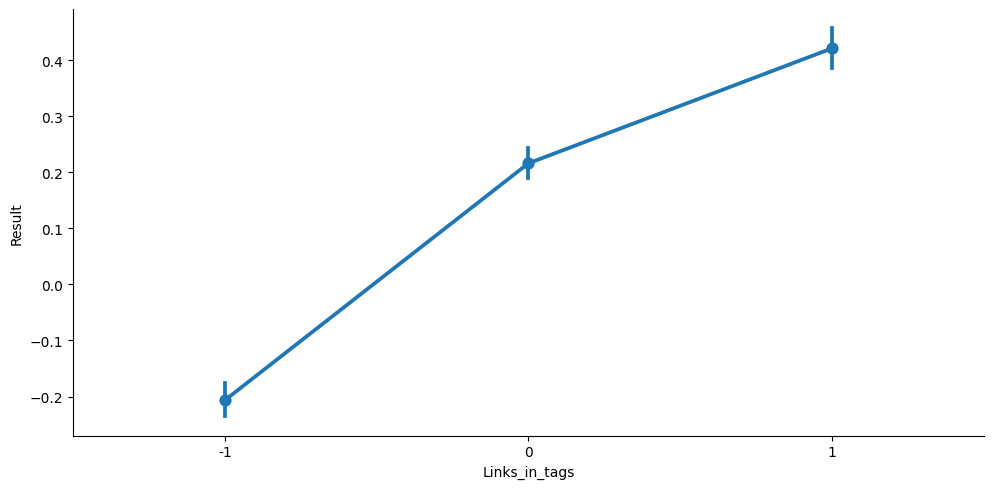

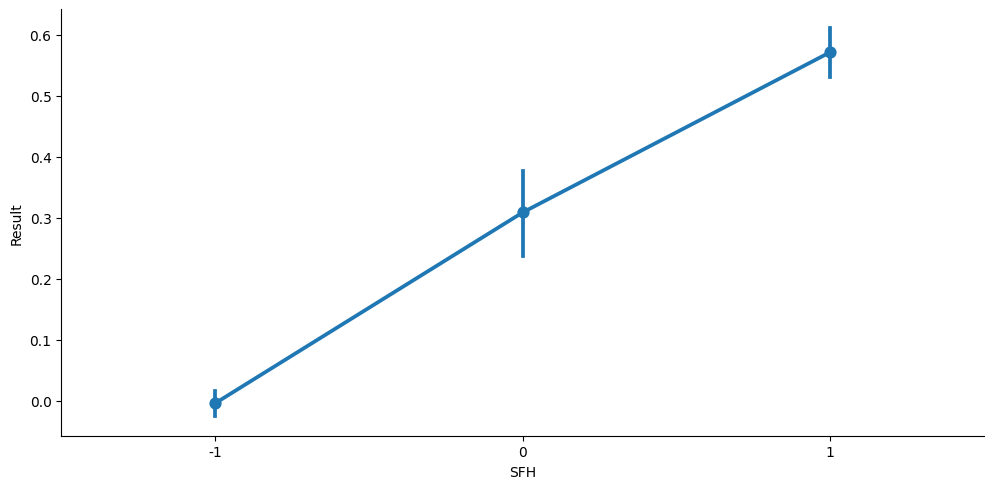

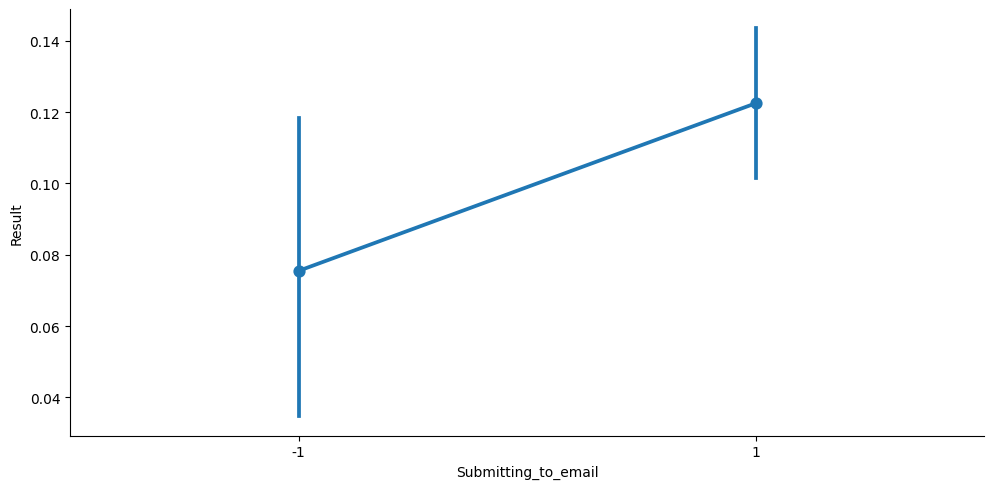

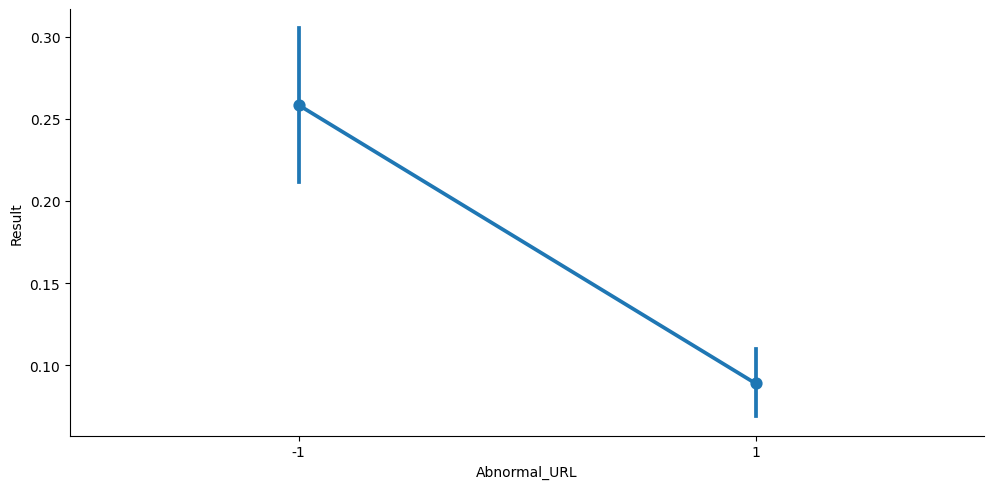

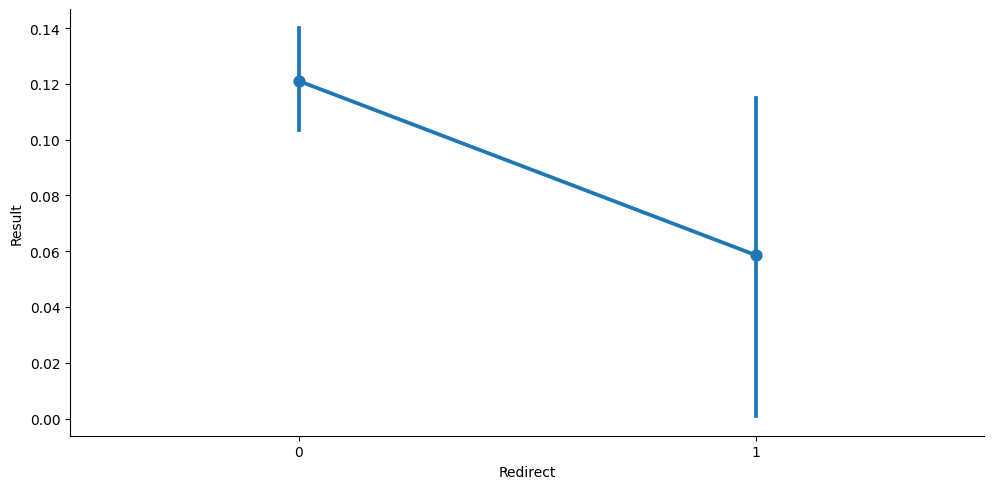

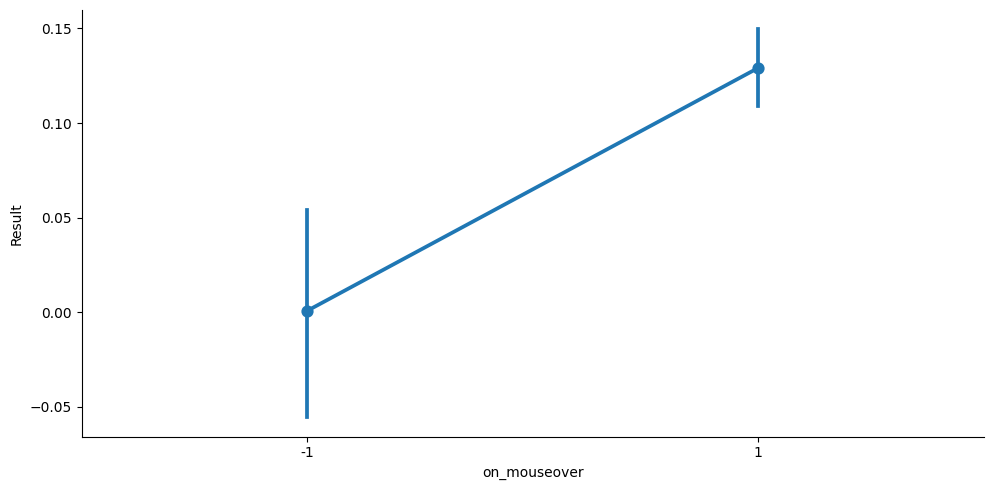

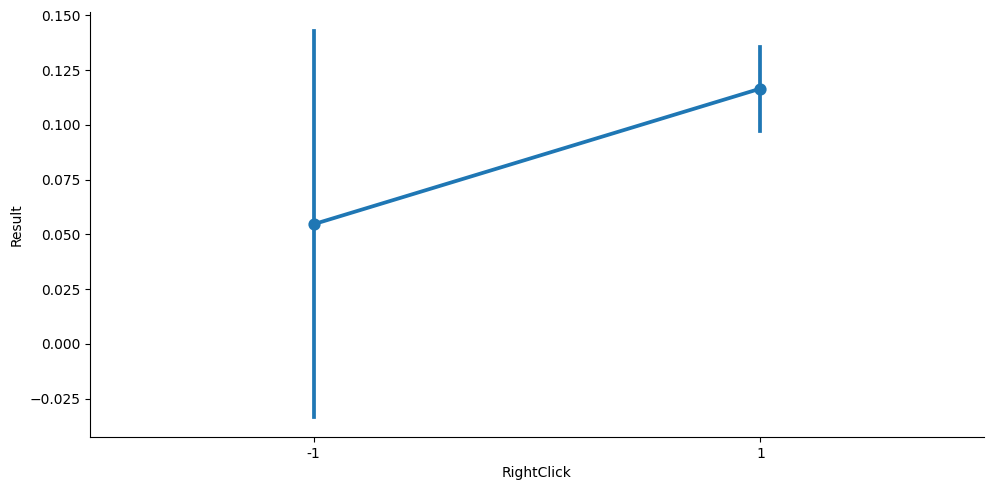

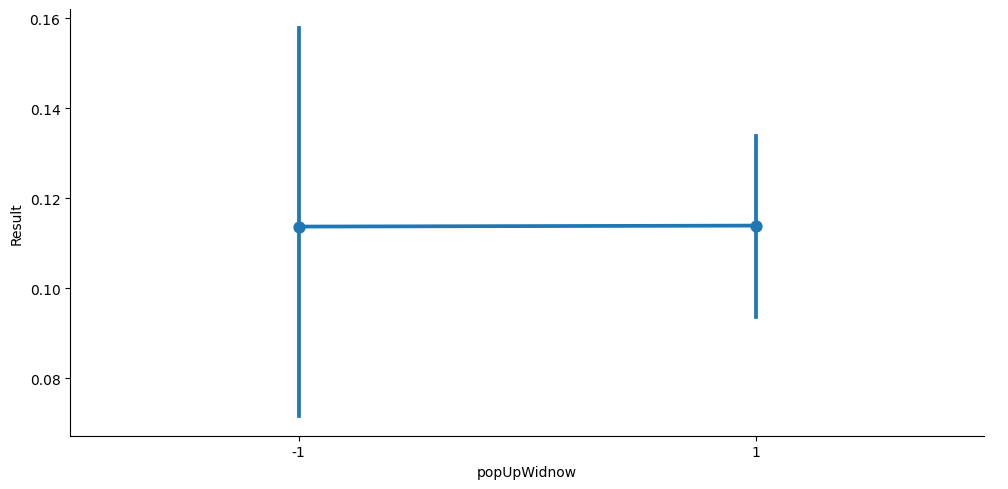

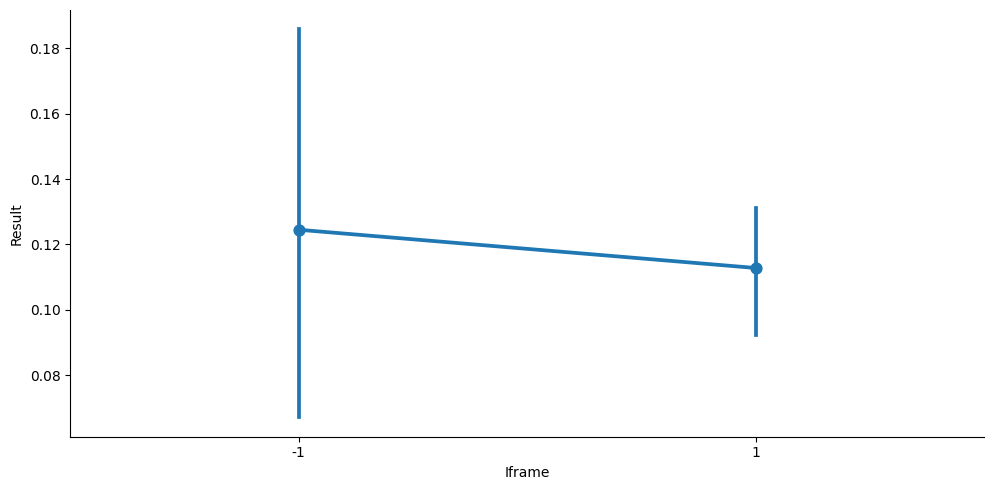

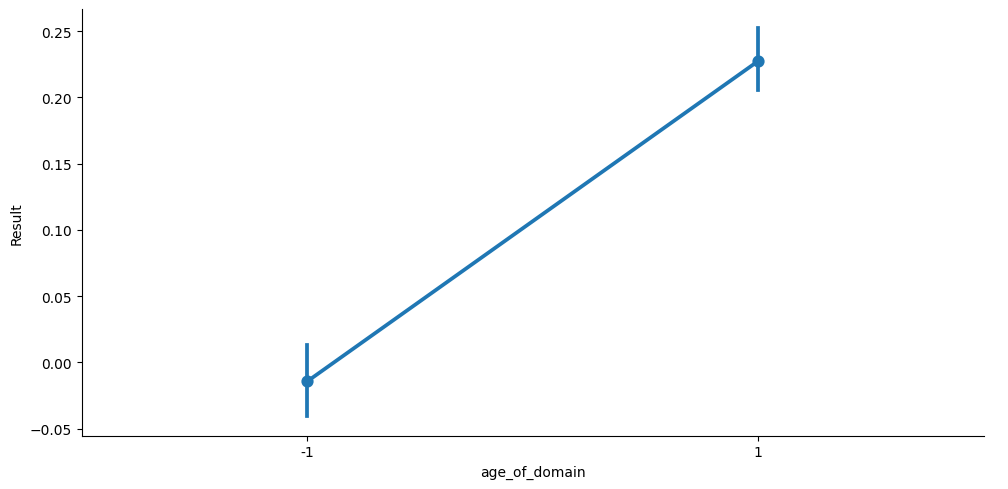

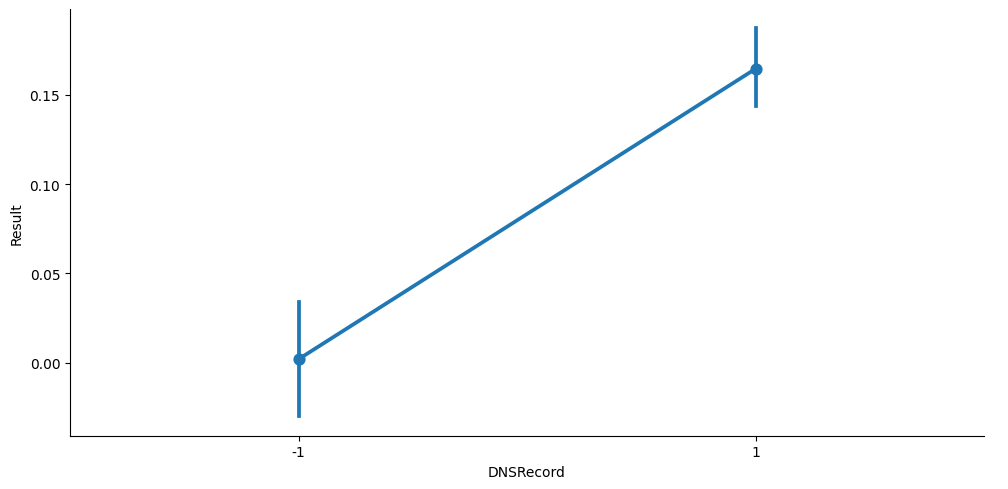

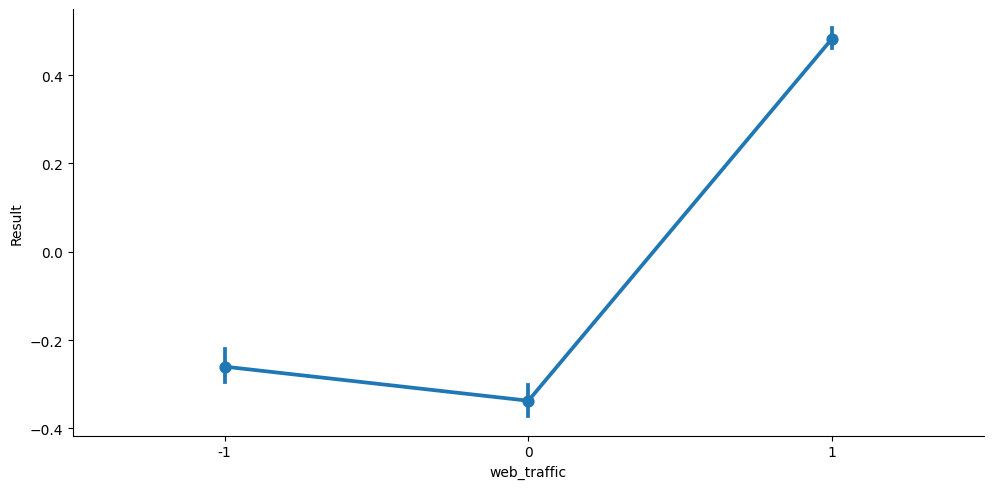

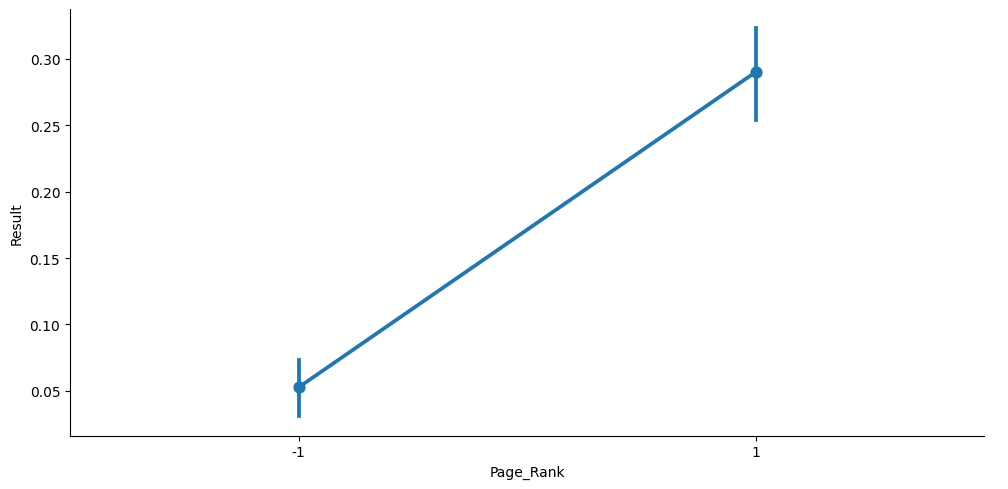

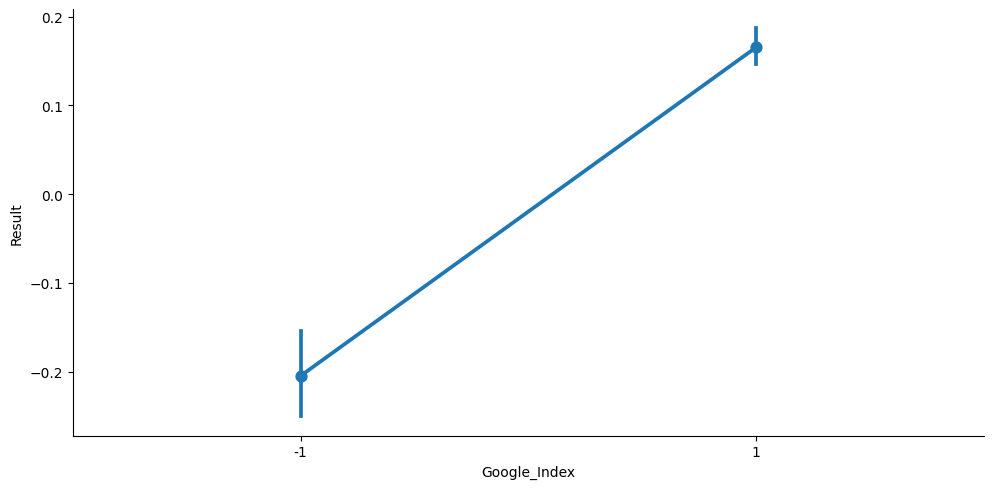

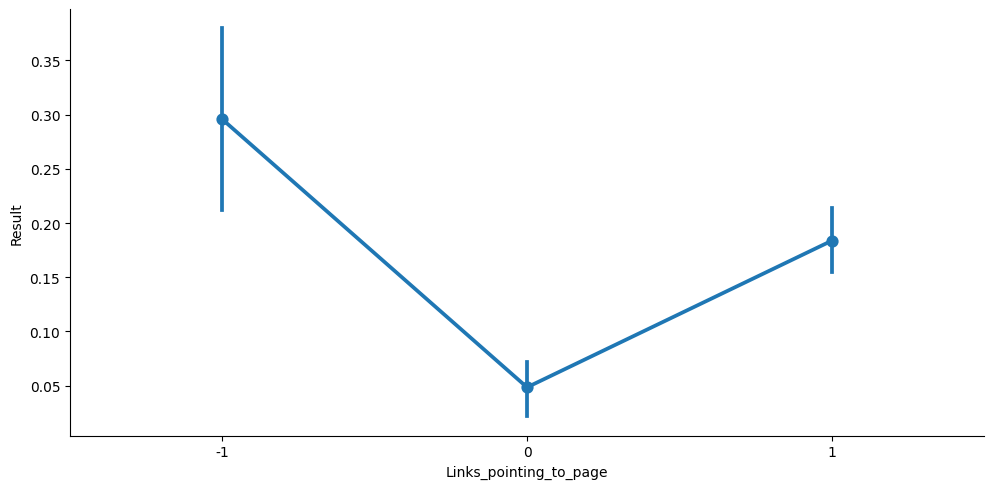

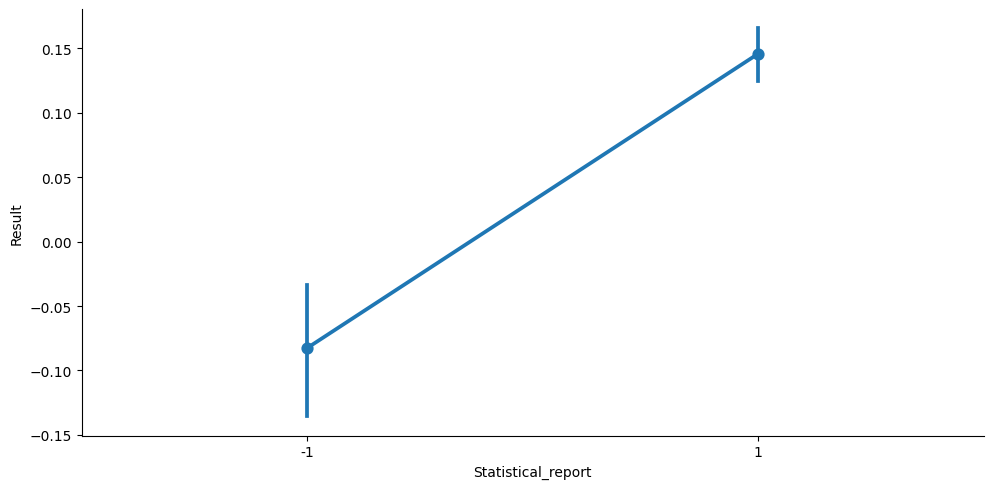

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
for i,col in enumerate (['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']):
    plt.figure(i)
    sns.catplot(x=col,y=df['Result'],data=df,kind='point',aspect=2)


In [16]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df, feature, label='Result'):
    table = pd.crosstab(df[feature], df[label])
    chi2, p, dof, ex = chi2_contingency(table)
    return p

# Store feature-pairs with their p-values
feature_pvalues = []

for f in df.columns:
    if f != 'Result':
        p = chi_square_test(df, f)
        feature_pvalues.append((f, p))

# Convert to DataFrame for better viewing
chi2_df = pd.DataFrame(feature_pvalues, columns=["Feature", "P-Value"])

# Sort by p-value (lower means more significant)
chi2_df_sorted = chi2_df.sort_values("P-Value")

# Filter significant features if needed
significant_df = chi2_df_sorted[chi2_df_sorted["P-Value"] < 0.05]

# Print result
print("Significant features with p-values:\n", significant_df)


Significant features with p-values:
                         Feature        P-Value
25                  web_traffic   0.000000e+00
6             having_Sub_Domain   0.000000e+00
7                SSLfinal_State   0.000000e+00
13                URL_of_Anchor   0.000000e+00
5                 Prefix_Suffix  1.139474e-293
12                  Request_URL  3.902709e-156
14                Links_in_tags  1.855675e-155
8   Domain_registeration_length  2.253279e-124
15                          SFH  1.642845e-118
27                 Google_Index   1.032457e-41
23                age_of_domain   2.913028e-37
26                    Page_Rank   4.728294e-28
0             having_IP_Address   5.078857e-23
29           Statistical_report   5.821611e-17
24                    DNSRecord   2.013671e-15
28       Links_pointing_to_page   3.587478e-15
1                    URL_Length   2.846999e-13
2            Shortining_Service   1.097324e-12
17                 Abnormal_URL   2.407051e-10
3              having_A

In [12]:
## -1 means used shortening service , 1 means not
df['Shortining_Service'].value_counts()

Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64

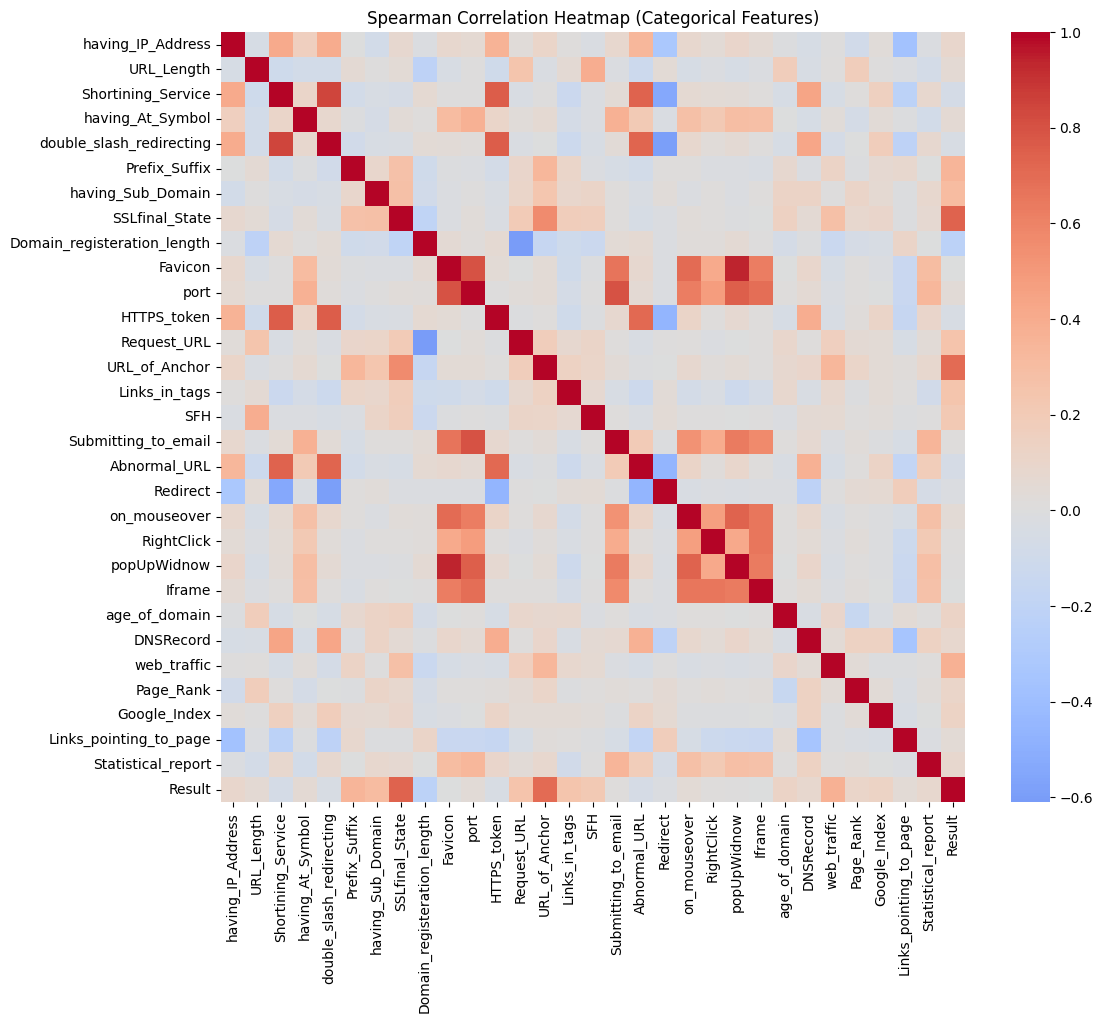

In [13]:
# Spearman correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_spearman = df.corr(method='spearman')

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=False, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap (Categorical Features)")
plt.show()


In [14]:
corr_spearman['Favicon'].sort_values(ascending=False)


Favicon                        1.000000
popUpWidnow                    0.939633
port                           0.803834
on_mouseover                   0.706179
Submitting_to_email            0.668317
Iframe                         0.627607
RightClick                     0.414382
having_At_Symbol               0.304899
Statistical_report             0.300917
DNSRecord                      0.088211
having_IP_Address              0.087025
Abnormal_URL                   0.071848
Domain_registeration_length    0.054253
HTTPS_token                    0.049483
URL_of_Anchor                  0.040695
double_slash_redirecting       0.035100
Page_Rank                      0.011699
Shortining_Service             0.006101
Result                        -0.000280
age_of_domain                 -0.002628
Request_URL                   -0.004620
Prefix_Suffix                 -0.007504
SFH                           -0.012391
SSLfinal_State                -0.013160
Redirect                      -0.015621


In [15]:
df["Redirect"].value_counts()

Redirect
0    9776
1    1279
Name: count, dtype: int64